## sympy functions:

##### b0, b1 = symbols('b0 b1')
##### x, y = symbols('x y', cls=Function)  -- define function
##### exp()
##### log()
##### plot()

##### Sum(i, (i, 0, n)) -- Accumulative sum
##### diff(function, b0) -- Calculate the derivative
##### .subs(a, b).doit() -- replace a using b
##### .replace(x, y)  -- replace a patten or function (different form .subs)
##### .lambdify([b1, b0], d_b1)  -- coverts a symbolic expression into a fast numerical function that can be used with Numpy


<br>
<br>


## Logistic Regression logics

In [197]:
import numpy as np
import pandas as pd
import math
import sympy
import matplotlib.pyplot as plt

### Example 6-1. The logistic function in Python for one independent variable

In [198]:
def predict(x, b0, b1):
    return 1 / (1 + math.exp(- (b0 + b1 * x)))

### Example 6-2. Using SymPy to plot a logistic function

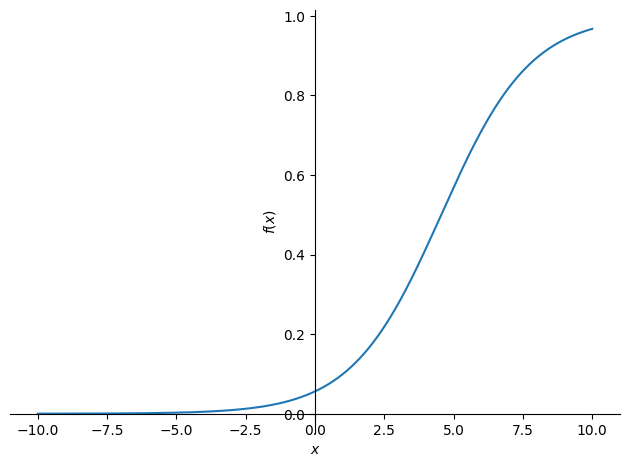

In [199]:
from sympy import symbols, exp, plot
x, b0, b1 = symbols('x b0 b1')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)

plot(p);

### Example 6-3. Using a plain logistic regression in SciPy

In [200]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',')

X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

model = LogisticRegression(penalty=None)
model.fit(X,Y)

w = model.coef_.flatten()
b = model.intercept_.flatten()


print('Intercept:', w)
print('coefficient:', b)

Intercept: [0.69268939]
coefficient: [-3.17580504]


##### Plot the logistic regression using the Intercept & Coefficient

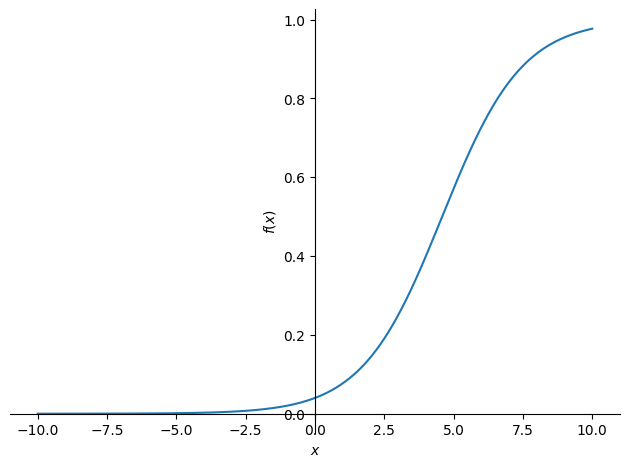

In [201]:
from sympy import symbols, exp, plot
def logistic_plot(w, b):
    x, b0, b1 = symbols('x b0 b1')
    p = 1 / (1 + exp(-(b0 + b1 * x)))
    p = p.subs(b0, b)
    p = p.subs(b1, w)
    plot(p)

logistic_plot(w[0], b[0])

### Example 6-4. Calculating the joint likelihood of observing all the points for a given logistic regression

#### Method 1:

In [202]:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1 / (1 + math.exp(-(b0 + b1 * x)))
    return p

joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    if p.y == 0.0:
        joint_likelihood *= (1 - logistic_function(p.x))
    
print(joint_likelihood)

4.7911180221699105e-05


#### Method 2:

In [203]:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1 / (1 + math.exp(-(b0 + b1 * x)))
    return p

joint_likelihood2 = 1.0
for p in patient_data:
    joint_likelihood2 *= logistic_function(p.x) ** p.y * (1 - logistic_function(p.x)) ** (1 - p.y)  ## Maximum likelihood

print(joint_likelihood2)

4.7911180221699105e-05


##### Method 3:

In [204]:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1 / (1 + math.exp(-(b0 + b1 * x)))
    return p

cost = 0
for p in patient_data:
    #cost +=-p.y * np.log(logistic_function(p.x)) - (1 - p.y) * np.log(1 - logistic_function(p.x))
    cost += -p.y*np.log(logistic_function(p.x)) - (1-p.y)*np.log(1-logistic_function(p.x))  ## Standard function in Machine Learning
     
print(np.exp(-cost))

4.791118022169896e-05


##### Method 4:

In [205]:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1 / (1 + math.exp(-(b0 + b1 * x)))
    return p

joint_likelihood = 0
for p in patient_data:
    joint_likelihood += np.log(logistic_function(p.x) ** p.y * (1 - logistic_function(p.x)) ** (1-p.y)) ## transfered from the multiple function

print(joint_likelihood)
print(np.exp(joint_likelihood))

-9.946161673231583
4.791118022169896e-05


### Example 6-8. Using gradient descent on logistic regression

In [206]:
import math
import pandas as pd
from sympy import *

points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)

(1 + exp(-(b0 + b1 * x(i))))

joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) \
	* (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

d_b1 = diff(joint_likelihood, b1) \
        .subs(n, len(points)-1).doit() \
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y)

d_b0 = diff(joint_likelihood, b0) \
        .subs(n, len(points)-1).doit() \
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y)

d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)


# Perform Gradient Descent
b1 = 0.01
b0 = 0.01
L = .01
for j in range(10_000):
    b1 += d_b1(b1, b0) * L  #because need to maximum the likelihood, so use +=
    b0 += d_b0(b1, b0) * L

## Multivariable Logistic Regression

#### Example 6-9. Doing a multivariable logistic regression on employee data

In [207]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


employee_data = pd.read_csv('https://tinyurl.com/y6r7qjrp')


inputs = employee_data.iloc[:,:-1]
output = employee_data.iloc[:,-1]
fit = LogisticRegression(penalty=None).fit(inputs, output)
print(f'coefficient: {fit.coef_}, intercept: {fit.intercept_}')

def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return 'Will leave {0}'.format(probabilities)
    else:
        return 'Will stay: {0}'.format(probabilities)

# Test a prediciton

n = input('Predict employee will stay or leave {sex}, {age}, {promotions}, {promotions}:')
(sex, age, promotions, years_employed) = n.split(',')
print(predict_employee_will_stay(int(sex), int(age), int(promotions),
    int(years_employed)))

coefficient: [[ 0.03216406  0.03683014 -2.50414078  0.97423186]], intercept: [-2.73503152]
Will stay: [[0.99806305 0.00193695]]


/opt/anaconda3/envs/anaconda-toolbox/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/anaconda-toolbox/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<br>
<br>


## Log-odds function

In [208]:
import numpy as np
import pandas as pd
import sympy

def sigmoid(x, b0, b1):
    z = b0 + b1 * x
    return 1 / (1 + np.exp(-z)), round(z,8)

In [209]:
p, z = sigmoid(6, -3.17576395, 0.69267212)

In [210]:
p / (1 - p)

2.6651724640787626

In [211]:
log_odd = float(sympy.log(p / (1 - p)))

In [212]:
log_odd

0.98026877

In [213]:
z

0.98026877

In [214]:
log_odd == z

True

#### Odds ratio stays consistent as x increase a consistent number

In [215]:
# set x as three numbers as constant increase
x1, x2, x3 = 8,6,4


In [216]:
p, z = sigmoid(x1, -3.17576395, 0.69267212)

odd_x1 = p / (1 - p)

log_odd_x1 = np.log(odd_x1)

print(f'odd: {odd_x1}, log_odd: {log_odd_x1}')

odd: 10.650565720069412, log_odd: 2.36561301


In [217]:
p, z = sigmoid(x2, -3.17576395, 0.69267212)

odd_x2 = p / (1 - p)

log_odd_x2 = np.log(odd_x2)

print(f'odd: {odd_x2}, log_odd: {log_odd_x2}')

odd: 2.6651724640787626, log_odd: 0.98026877


In [218]:
p, z = sigmoid(x3, -3.17576395, 0.69267212)

odd_x3 = p / (1 - p)

log_odd_x3 = np.log(odd_x3)

print(f'odd: {odd_x3}, log_odd: {log_odd_x3}')

odd: 0.6669264760179682, log_odd: -0.40507546999999977


In [219]:
print(f'odd_ratio1: {odd_x1 / odd_x2}')
print(f'odd_ratio1: {odd_x2 / odd_x3}')

odd_ratio1: 3.9962013204090576
odd_ratio1: 3.9962013204090554


<br>
<br>

## $R^2$ : Log likelihood and Log likelihood of fit
#### minimize the Log likelihodd of fit can be used to calculate the Gradient Descent for w and b parameters
#### $R^2 = \frac{(log\ likelihood) - (log\ likelihood\ of\ fit)}{(log\ likelihood)}$

$Log\  likelihood\  of\ fit = \sum_{i=0}^{m}  (y^i * log(f\_wb) + (1 - y^i) * log(1 - f\_wb))$

$log\ likelihood = \sum_{i=0}^{m} (y^i * log(\frac{\sum{yi}}{n}) + (1 - y^i) * log(1 - \frac{\sum{yi}}{n}))$

##### Log likelihood of fit - method 1

In [220]:
from math import log, exp
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Sum the log-likelihoods
log_likelihood_fit = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood_fit += log(logistic_function(p.x))
    if p.y == 0.0:
        log_likelihood_fit += log(1 - logistic_function(p.x))
print(log_likelihood_fit)

-9.946161673231583


##### Log likelihood of fit - method 2

In [221]:
from math import log, exp
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Sum the log-likelihoods
log_likelihood_fit = 0.0

for p in patient_data:
    log_likelihood_fit += p.y * log(logistic_function(p.x)) + (1 - p.y) * log(1 - logistic_function(p.x))
print(log_likelihood_fit)

-9.946161673231583


##### Log likelihood - method 1

In [222]:
from math import log, exp
import pandas as pd

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())

likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = 0.0
for p in patient_data:
    if p.y == 1.0:
        log_likelihood += log(likelihood)
    if p.y == 0.0:
        log_likelihood += log(1 - likelihood)

In [223]:
log_likelihood

-14.341070198709906

##### Log likelihood - method 2

In [224]:
from math import log, exp
import pandas as pd

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())

likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = 0
for p in patient_data:
    log_likelihood += p.y * log(likelihood) + (1 - p.y) * log(1 - likelihood)

In [225]:
log_likelihood

-14.341070198709906

$R^2$

In [227]:
(log_likelihood - log_likelihood_fit) / log_likelihood

0.306456105756576

#### Using statemodel to calculate $R^2$

In [251]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")

In [252]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = sms.add_constant(x)

In [253]:
model = sms.Logit(y, x)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.473627
         Iterations 6


In [254]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.3065
Time:                        11:26:50   Log-Likelihood:                -9.9462
converged:                       True   LL-Null:                       -14.341
Covariance Type:            nonrobust   LLR p-value:                  0.003029
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1758      1.553     -2.045      0.041      -6.220      -0.131
x              0.6927      0.297      2.331      0.020       0.110       1.275
==============================================================================
"""

<br>

## P Value
##### how likely we would have see this data by chance rather than because of an actual relationship, this means we need a p-value

In [256]:
from scipy.stats import chi2

In [258]:
# it provides the likelihood that the value would be around 2 * (log_likelihood_fit - log_likelihood). Not true probability
# Because the probability of any single value in a continuous distribution is zero
chi2.pdf(2 * (log_likelihood_fit - log_likelihood), 1)

0.0016604875618753787

In [282]:
# this would provide the true probability the value would be smafler than 2 * (log_likelihood_fit - log_likelihood). True probability
chi2.cdf(2 * (log_likelihood_fit - log_likelihood), 1)

0.9969708337388

## Check chi-square distribution

#### Chi-square distribution is the square of the normal distribution (mean=0, std=1)

In [273]:
import matplotlib.pyplot as plot

In [274]:
a = np.random.standard_normal(100_000)

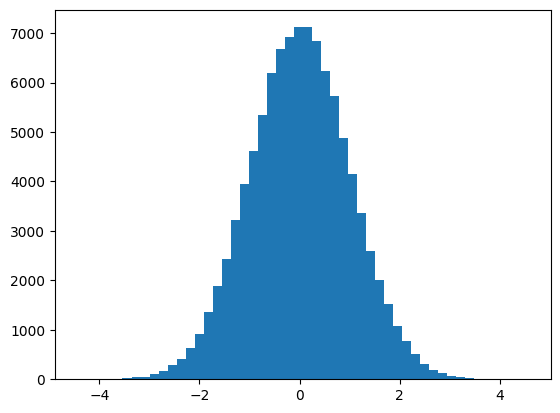

In [275]:
plt.hist(a, bins=50);

In [276]:
chi = a ** 2

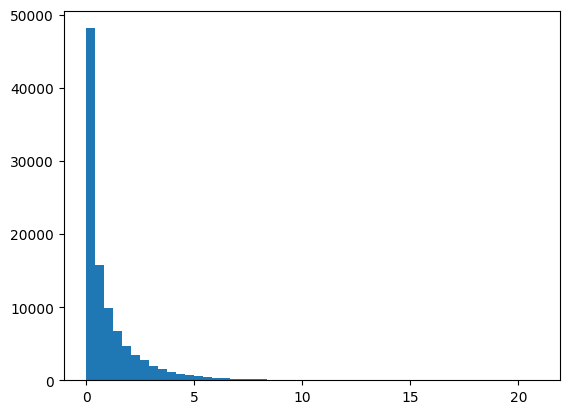

In [277]:
plt.hist(chi, bins=50);